In [1]:
!pip install pandas

In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Menghubungkan ke google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Menentukan direktori dataset yang ingin diambil
base_dir = '/content/drive/My Drive/Project/Time Series/Dataset'
!ls "/content/drive/My Drive/Project/Time Series/Dataset"

'Data CPI FB 2010-Feb2024.xlsx'  'Output Data CPI FB 2010-Feb2024.xlsx'


In [5]:
#Menyusun ulang dataset

# Ganti 'nama_file.xlsx' dengan nama file Excel yang sesuai
nama_file = '/content/drive/My Drive/Project/Time Series/Dataset/Data CPI FB 2010-Feb2024.xlsx'

# Baca data dari file Excel
df = pd.read_excel(nama_file)

# Menghilangkan kolom 't' jika ada
if 't' in df.columns:
    df = df.drop(columns=['t'])

# Menambahkan judul kolom
df.columns = ['Month_Year', 'CPI']

# Simpan DataFrame ke dalam file Excel
file_output = '/content/drive/My Drive/Project/Time Series/Dataset/Output Data CPI FB 2010-Feb2024.xlsx'
df.to_excel(file_output, index=False)

print(f"Data berhasil disimpan di {file_output}")

Data berhasil disimpan di /content/drive/My Drive/Project/Time Series/Dataset/Output Data CPI FB 2010-Feb2024.xlsx


In [6]:
# Membaca file yang sudah disusun

# Ganti 'nama_file.xlsx' dengan nama file Excel yang sesuai
nama_file_output = '/content/drive/My Drive/Project/Time Series/Dataset/Output Data CPI FB 2010-Feb2024.xlsx'

# Baca data dari file Excel
df = pd.read_excel(nama_file_output)

# Tampilkan beberapa baris pertama data
print(df.head())

#Menghitung jumlah baris data
num_rows = df.shape[0]
print("Number of rows:", num_rows)

  Month_Year    CPI
0 2010-01-01  122.4
1 2010-02-01  122.5
2 2010-03-01  122.4
3 2010-04-01  122.4
4 2010-05-01  122.9
Number of rows: 170


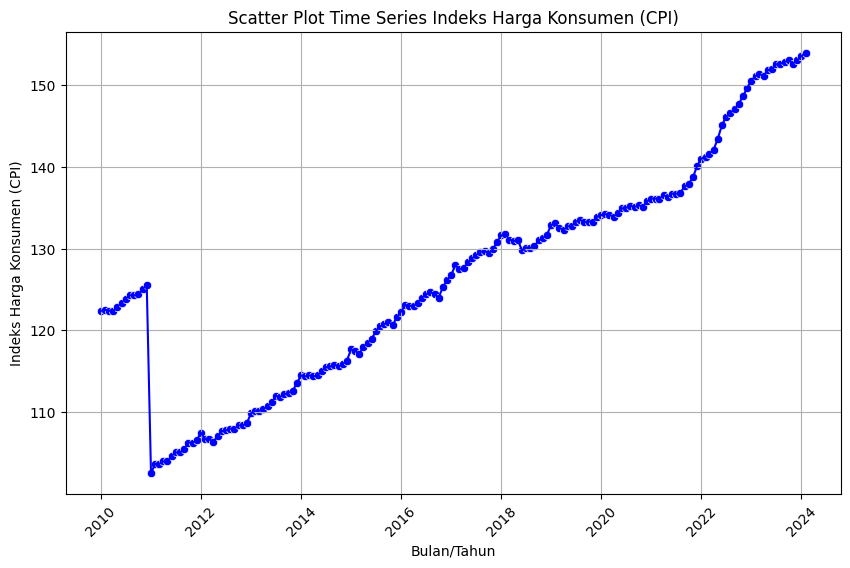

In [7]:
# Baca data dari file Excel
df = pd.read_excel(nama_file_output)

# Mengubah kolom 'Month_Year' menjadi format datetime
df['Month_Year'] = pd.to_datetime(df['Month_Year'])

# Plot data CPI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Month_Year', y='CPI', color='b', marker='o')
sns.lineplot(data=df, x='Month_Year', y='CPI', color='b')
plt.xlabel('Bulan/Tahun')
plt.ylabel('Indeks Harga Konsumen (CPI)')
plt.title('Scatter Plot Time Series Indeks Harga Konsumen (CPI)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

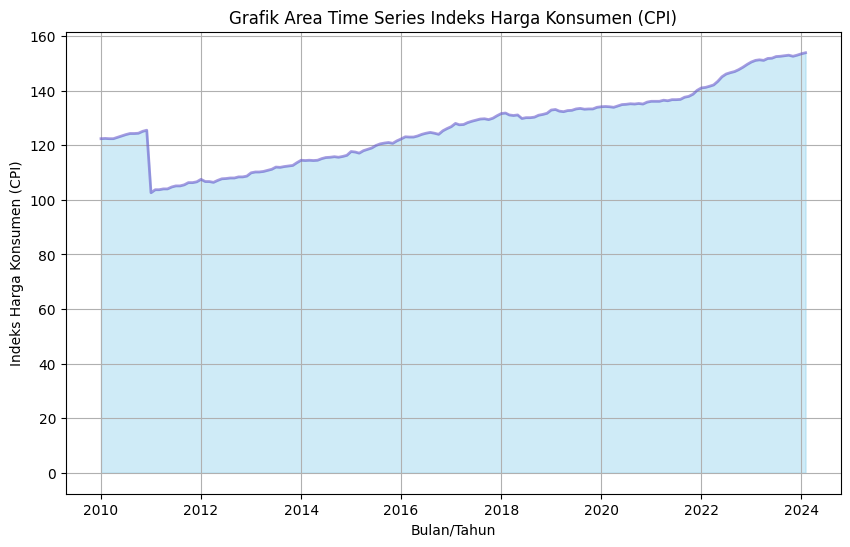

In [8]:
# Baca data dari file Excel
df = pd.read_excel(nama_file_output)

# Mengubah kolom 'Month_Year' menjadi format datetime
df['Month_Year'] = pd.to_datetime(df['Month_Year'])

# Grafik area
plt.figure(figsize=(10, 6))
plt.fill_between(df['Month_Year'], df['CPI'], color='skyblue', alpha=0.4)
plt.plot(df['Month_Year'], df['CPI'], color='Slateblue', alpha=0.6, linewidth=2)
plt.xlabel('Bulan/Tahun')
plt.ylabel('Indeks Harga Konsumen (CPI)')
plt.title('Grafik Area Time Series Indeks Harga Konsumen (CPI)')
plt.grid(True)
plt.show()

In [11]:
# Memproses data dengan Algoritma Neural Network
df = pd.read_excel(nama_file_output)

# Prepare features and target
X = df['Month_Year'].values
y = df['CPI'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

# Build simpler ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with fewer epochs
model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, verbose=1)

# Evaluate the model
predicted = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (ANN): {mse:.4f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Epoch 1/50
85/85 [==============================] - 1s 1ms/step - loss: 16633.5840
Epoch 2/50
85/85 [==============================] - 0s 1ms/step - loss: 16346.4648
Epoch 3/50
85/85 [==============================] - 0s 2ms/step - loss: 15621.2559
Epoch 4/50
85/85 [==============================] - 0s 1ms/step - loss: 13924.6826
Epoch 5/50
85/85 [==============================] - 0s 2ms/step - loss: 10870.7666
Epoch 6/50
85/85 [==============================] - 0s 2ms/step - loss: 6774.8506
Epoch 7/50
85/85 [==============================] - 0s 2ms/step - loss: 2987.4966
Epoch 8/50
85/85 [==============================] - 0s 2ms/step - loss: 821.7447
Epoch 9/50
85/85 [==============================] - 0s 2ms/step - loss: 142.4495
Epoch 10/50
85/85 [==============================] - 0s 2ms/step - loss: 33.6728
Epoch 11/50
85/85 [==============================] - 0s 2ms/step - loss: 22.2315
Epoch 12/50
85/85 [==============================] - 0s 2ms/step - loss: 20.0111
Epoch 13/50
85/8

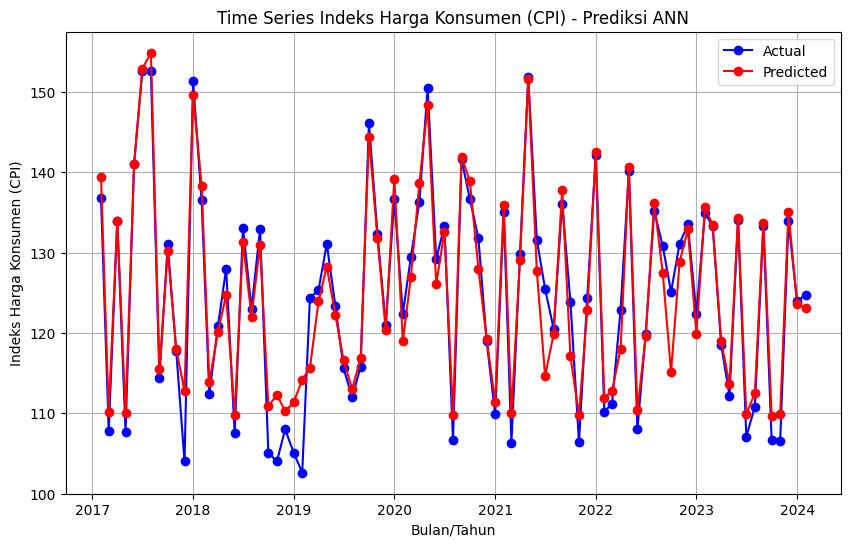

In [12]:
# Visualisasi hasil prediksi dari ANN

# Konversi kolom 'Month_Year' menjadi tipe data datetime
df['Month_Year'] = pd.to_datetime(df['Month_Year'])

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df['Month_Year'][-len(y_test):], y_test, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df['Month_Year'][-len(y_test):], predicted[:,0], marker='o', linestyle='-', color='r', label='Predicted')
plt.xlabel('Bulan/Tahun')
plt.ylabel('Indeks Harga Konsumen (CPI)')
plt.title('Time Series Indeks Harga Konsumen (CPI) - Prediksi ANN')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Memproses data dengan algoritma LSTM
df = pd.read_excel(nama_file_output)

# Mengatur 'Month_Year' sebagai indeks
df.set_index('Month_Year', inplace=True)

# Scaling data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split data menjadi train dan test set
train_size = int(len(df_scaled) * 0.8)
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size,:], df_scaled[train_size:len(df_scaled),:]

# Fungsi untuk membuat dataset dengan timesteps
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

# Menyiapkan data untuk LSTM
time_steps = 12  # misalnya, menggunakan data 12 bulan sebelumnya untuk memprediksi bulan berikutnya
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape data ke [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Membangun model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Prediksi data test
predicted = model.predict(X_test)

# Mengembalikan skala data ke bentuk semula
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
mse = mean_squared_error(y_test[0], predicted[:,0])
print(f"Mean Squared Error (LSTM): {mse:.4f}")

rmse = np.sqrt(mean_squared_error(y_test[0], predicted[:,0]))
print(f"Root Mean Squared Error (LSTM): {rmse:.4f}")

Epoch 1/50
4/4 [==============================] - 5s 21ms/step - loss: 0.1447
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0436
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0140
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0242
Epoch 5/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0112
Epoch 6/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0114
Epoch 7/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0129
Epoch 8/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0102
Epoch 9/50
4/4 [==============================] - 0s 21ms/step - loss: 0.0079
Epoch 10/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0087
Epoch 11/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 12/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0071
Epoch 13/50
4/4 [==============================] - 0s 13ms/st

1/1 [==============================] - 1s 715ms/step
Mean Squared Error (LSTM): 4.1310
Root Mean Squared Error (LSTM): 2.0325


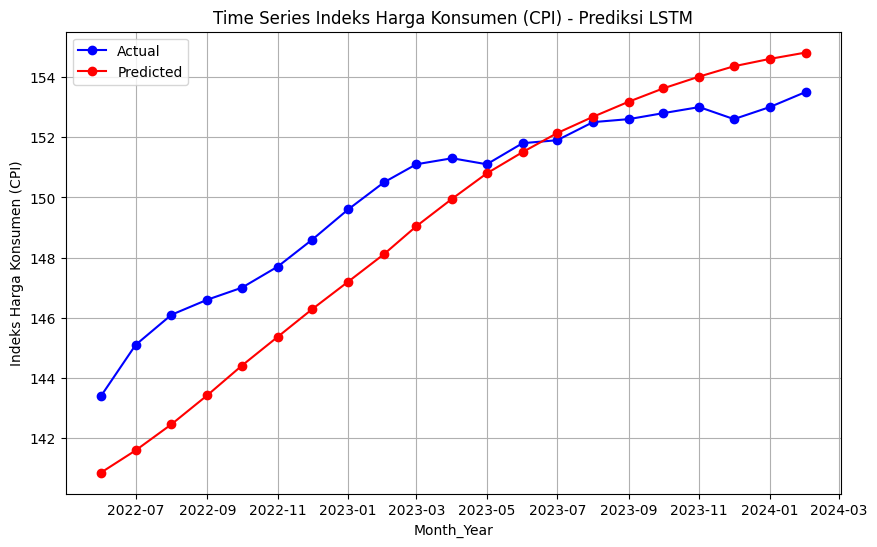

In [15]:
# Plot hasil prediksi LSTM

plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test[0]):], y_test[0], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df.index[-len(y_test[0]):], predicted[:,0], marker='o', linestyle='-', color='r', label='Predicted')
plt.xlabel('Month_Year')
plt.ylabel('Indeks Harga Konsumen (CPI)')
plt.title('Time Series Indeks Harga Konsumen (CPI) - Prediksi LSTM')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Memprediksi 6 tahun ke depan sampai 2030

# Inisialisasi data input untuk prediksi
last_input = X_test[-1]

# Inisialisasi list untuk menyimpan hasil prediksi
future_predictions = []

# Tentukan berapa banyak bulan ke depan yang ingin diprediksi
num_months_to_predict = 72  # Prediksi 6 tahun ke depan

# Loop untuk melakukan prediksi bulan demi bulan
for _ in range(num_months_to_predict):
    # Prediksi nilai bulan berikutnya
    next_prediction = model.predict(np.array([last_input]))

    # Tambahkan hasil prediksi ke list hasil prediksi
    future_predictions.append(next_prediction[0, 0])

    # Perbarui input untuk prediksi bulan berikutnya dengan hasil prediksi terbaru
    last_input = np.roll(last_input, -1)  # Geser data input satu langkah ke kiri
    last_input[-1] = next_prediction  # Gunakan hasil prediksi sebagai nilai terakhir input

# Mengubah hasil prediksi menjadi numpy array
future_predictions = np.array(future_predictions)

# Mengembalikan skala data ke bentuk semula
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Membuat index baru untuk data prediksi berdasarkan index terakhir dari data asli
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_months_to_predict, freq='M')

# Membuat DataFrame untuk prediksi masa depan
future_df = pd.DataFrame({
    'Predicted_Future': future_predictions.flatten()
}, index=future_dates)

# Menggabungkan data asli dan prediksi masa depan
final_df = pd.concat([df, future_df], axis=0)

1/1 [==============================] - 0s 86ms/step


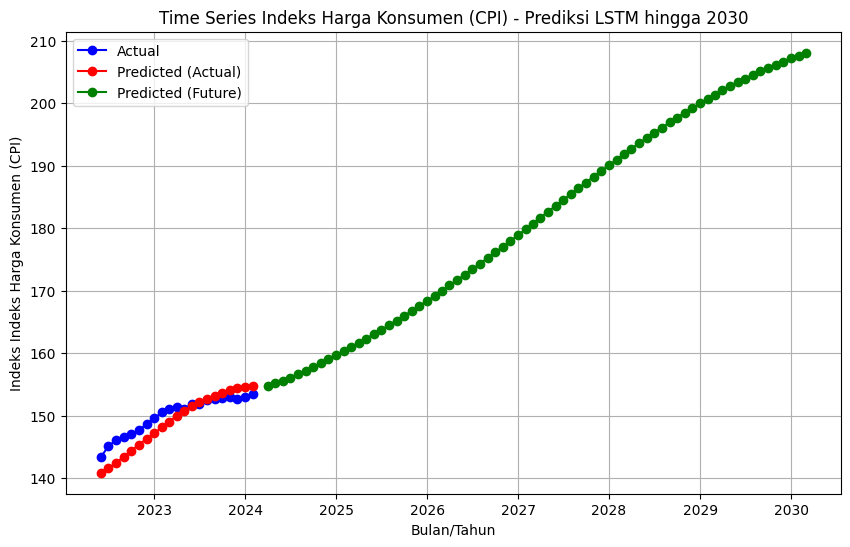

In [17]:
# Plot hasil prediksi hingga tahun 2030

plt.figure(figsize=(10, 6))

# Plot data aktual yang diketahui hingga saat ini
plt.plot(df.index[-len(y_test[0]):], y_test[0], marker='o', linestyle='-', color='b', label='Actual')

# Plot hasil prediksi yang telah diketahui (hingga waktu saat ini)
plt.plot(df.index[-len(y_test[0]):], predicted[:,0], marker='o', linestyle='-', color='r', label='Predicted (Actual)')

# Plot hasil prediksi di masa depan
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='g', label='Predicted (Future)')

plt.xlabel('Bulan/Tahun')
plt.ylabel('Indeks Indeks Harga Konsumen (CPI)')
plt.title('Time Series Indeks Harga Konsumen (CPI) - Prediksi LSTM hingga 2030')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Menyimpan hasil prediksi ke dalam file Excel
output_file = '/content/drive/My Drive/Project/Time Series/Hasil Prediksi/Hasil Prediksi Data CPI FB 2010-Feb2024.xlsx'

# Membuat dataframe dari hasil prediksi
final_df.to_excel(output_file)

print(f"Hasil prediksi telah disimpan ke {output_file}")

Hasil prediksi telah disimpan ke /content/drive/My Drive/Project/Time Series/Hasil Prediksi/Hasil Prediksi Data CPI FB 2010-Feb2024.xlsx
